Number of passengers in train dataset: 891
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       153
           1       0.81      0.65      0.72       115

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268

Accuracy:  0.7835820895522388
Test Prediction:  [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 

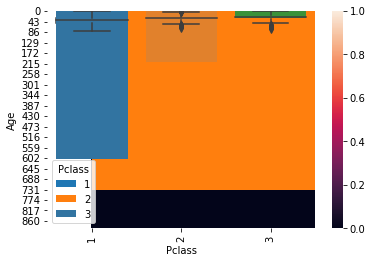

In [110]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Load the data
#titanic = sns.load_dataset('titanic')
titanic=pd.read_csv("https://raw.githubusercontent.com/subhankarbasak/Titanic-Survival/main/titanic_train.csv")
titanic_test=pd.read_csv("https://raw.githubusercontent.com/subhankarbasak/Titanic-Survival/main/titanic_test.csv")
print('Number of passengers in train dataset: ' + str(len(titanic)))
# Number of passengers Survived
sns.countplot(x = 'Survived', data = titanic)
# Number of passengers Survived based on Passenger Class
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic)
# Frequency of passengers group by Age
titanic['Age'].plot.hist()
# Frequency of passengers group by Fare
titanic['Fare'].plot.hist()
# Train Dataset Information
#titanic.info()
# Number of siblings / spouses aboard the Titanic
sns.countplot(x = 'SibSp', data = titanic)
# Check for NULL values in training set
titanic.isnull().sum()
# Heatmap for NULL values
sns.heatmap(titanic.isnull())
# Passenger Class vs Age
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)
# Data Preprocessing ####
# Train Data
sex = pd.get_dummies(titanic['Sex'], drop_first = True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)
pcl = pd.get_dummies(titanic['Pclass'],drop_first=True)
# Concat new features in train data
titanic = pd.concat([titanic,sex,embark,pcl],axis=1)
titanic.head()
# Dropping columns from train dataset
titanic.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)
titanic.head()
# Check for NULL values
titanic.isnull().sum()
# Handling NULL values
titanic_values = {'Age': round(np.mean(titanic['Age']))}
titanic = titanic.fillna(value = titanic_values)
titanic.head()
# Test Data
sex = pd.get_dummies(titanic_test['Sex'], drop_first = True)
embark = pd.get_dummies(titanic_test['Embarked'],drop_first=True)
pcl = pd.get_dummies(titanic_test['Pclass'],drop_first=True)
# Concat new features in test data
titanic_test = pd.concat([titanic_test,sex,embark,pcl],axis=1)
titanic_test.head()
# Dropping columns from train dataset
titanic_test.drop(['Pclass','Sex','Embarked','Cabin','PassengerId','Name','Ticket'],axis=1, inplace=True)
# Check for NULL values
titanic_test.isnull().sum()
# Handling NULL values
titanic_test_values = {'Age':round(np.mean(titanic_test['Age'])), 'Fare':round(np.mean(titanic_test['Fare']))}
titanic_test = titanic_test.fillna(value = titanic_test_values)
titanic_test.head()
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#Define Model
logmodel = LogisticRegression(solver = 'liblinear')
#Fit Model
logmodel.fit(X_train, y_train)
predections = logmodel.predict(X_test)
# Classification Report
print(classification_report(y_test, predections))
pd.DataFrame(confusion_matrix(y_test,predections),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])
# Accuracy
print("Accuracy: ",accuracy_score(y_test, predections))
# Prediction
test_predictions = logmodel.predict(titanic_test)
print("Test Prediction: ", test_predictions)